<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/Exercises_1_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
var_names = ['WIFE_AGE','WIFE_EDU','HUSB_EDU','NUM_OF_CHILD','WIFE_RELI','WIFE_WORK','HUSB_OCUP','STA_OF_LIV','MEDIA_EXP','CONTRACEPTIVE']
data = pd.read_csv("C:/Users/pasto/Downloads/contrap.csv", sep = ",", header = None, names = var_names)

#we separate independent variables from the one we want to predict
features = (o for o in var_names if o != 'CONTRACEPTIVE')
X = data[features]
Y = data['CONTRACEPTIVE']

In [0]:
#in order to use logistic regression we have to binarize the dependent variable
import numpy as np
Y_red = np.where(Y==1,0,1)

In [0]:
#we process a little bit our covariates
import pandas as pd
a_dummies = ['WIFE_EDU','HUSB_EDU','HUSB_OCUP','STA_OF_LIV']
for var in a_dummies:
    X.loc[:,var] = X.loc[:,var].copy().astype(str)
X_dum = pd.get_dummies(X[a_dummies])

A_garder = [var for var in list(X) if var not in a_dummies]
X = X[A_garder]
X = pd.concat([X,X_dum],axis=1)

In [0]:
#we separate the dataset in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y_red,random_state=1998,test_size=0.3)


In [0]:
#we call the logistic model with specified parameters
from sklearn.linear_model import LogisticRegression
logit1 = LogisticRegression(penalty = 'l2', random_state = 1998, solver='lbfgs', C=1/2, max_iter=1000)

In [0]:
#we train the model with 70% of dataset
logit1.fit(X_train, Y_train)
Y_pred = logit1.predict(X_test)

In [0]:
#we calculate the performance of our omodel through accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.667420814479638

In [0]:
#we compute the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[ 91, 100],
       [ 47, 204]], dtype=int64)

In [0]:
#we predict the probabilities
Y_pred_prob = logit1.predict_proba(X_test)

In [0]:
#we calculate the area under the curve
from sklearn.metrics import roc_auc_score, auc
roc_auc_score(Y_test,Y_pred_prob[:,1])

0.7145241025427088

In [0]:
#we calculate the values of FPR and TPR
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(Y_test, Y_pred_prob[:,1])

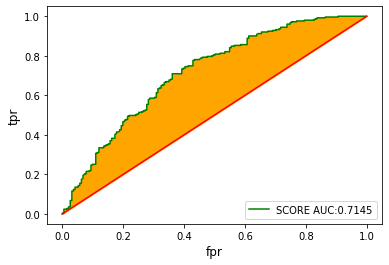

In [0]:
#we in the end plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = "green", label = "SCORE AUC:"+str(np.round(auc(fpr, tpr),4)))
plt.plot([0,1], [0,1], color = "red")
plt.legend(loc=4)
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr, color = "orange")
plt.show()

In [0]:
#EXERCISE 3
#we now train a random forest model on the same data

from sklearn.ensemble import RandomForestClassifier
randfo = RandomForestClassifier(random_state=1998, criterion = 'gini', min_samples_split=3, max_depth = 9, 
                                min_samples_leaf=2, max_features=0.7)


#3.2
# The 'max_features' parameter express the maximum percentage of features the algorithm is allowed 
#to use for each individual tree.

In [0]:
#we train de model and predicted values
randfo.fit(X_train, Y_train)
Y_pred_rf = randfo.predict(X_test)

In [0]:
#we calculate the accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred_rf)
print("Accuracy is "+str(round(acc,4)))

L'accuracy est 0.7217


In [0]:
#we predict the probabilities
Y_pred_prob_rf = randfo.predict_proba(X_test)

#we calculate also the ROC curve and the corresponding AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test, Y_pred_prob_rf[:,1])
auc = auc(fpr,tpr)
print("The AUC score is "+str(round(auc,4)))

Le score AUC est 0.7886
